# Notebook #4: EDA: exploración de los datos

In [1]:
# Importamos las librerías que necesitamos

# Librerías de extracción de datos
# -----------------------------------------------------------------------

%load_ext autoreload
%autoreload 2

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

import sys
sys.path.append('../..')
from src import funciones as f
from src import soporte_prep as sp

import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

In [2]:
df_2023 = pd.read_csv('../../Datos/datos_parquev/df_2023.csv', index_col=0)

# EDA hasta el 2023

### Cierre del Parque Vehicular en 2023

- **Total de vehículos**:  
  - Para el cierre de **2023**, el país contaba con un total de **5,809,136 vehículos** en todo el territorio.  
  - **Distribución por tipo de vehículo**:  
    - **Motocicletas**: **56%**  
    - **Automóviles**: **19.3%**  
    - **Jeepetas ('Jeep')**: **11.67%**  
    - **Otros**: Vehículos de carga, autobuses, máquinas pesadas, volteos, entre otros.

---

### Distribución del Parque Vehicular por Provincia

- **Concentración vehicular**:  
  - **Distrito Nacional**: **30%** (**30.20%**) de los vehículos.  
  - **Santo Domingo**: **16.04%**.  
  - **Santiago**: **7.92%**.  
  - **La Vega**: **5.37%**.  

  Esto indica que el **45%** de los vehículos se encuentra en la **Región Ozama** (Distrito Nacional y Santo Domingo).  
  Además, **Santiago** (Región Cibao Norte) y **La Vega** (Región Cibao Sur) contribuyen a elevar la presencia vehicular al **60%** del total en el país.  
  En el **top 5** también se encuentra la provincia de **San Cristóbal**, perteneciente a la **Región Valdesia** pero con cercanía geográfica a la Región Ozama.

---

### Categorías de Vehículos por Distrito Nacional

- **Distrito Nacional** concentra el mayor número de vehículos en todas las categorías:  
  - **Automóviles**: Más de **445,000** (**449,502**).  
  - **Autobuses**: Más de **50,000** (**50,151**).  
  - **Jeepetas ('Jeep')**: Aproximadamente la mitad de los automóviles (**228,591**).  
  - **Motocicletas**: El dato más alarmante, con casi un millón (**782,430**).

---

### Categorías de Vehículos por Santo Domingo

- En la provincia de **Santo Domingo**, los números también son elevados:  
  - **Automóviles**: **257,634**.  
  - **Jeepetas ('Jeep')**: **135,315**.  
  - **Motocicletas**: **412,535**.

En ambas provincias (Distrito Nacional y Santo Domingo), las **motocicletas** superan a los demás vehículos con un **ratio de casi 2:1**.  
Esto puede explicarse por:  
1. **Tamaño geográfico reducido**, pero con una alta concentración vehicular que genera embotellamientos.  
2. Las motocicletas se utilizan como **sistema económico**, ya que son un medio de transporte asequible para:  
   - Movilizar personas.  
   - Realizar entregas o mandados.  
3. El **costo de mantenimiento** de una motocicleta es considerablemente menor que el de un automóvil.  
4. La **falta de un sistema de transporte público eficiente** en República Dominicana, que limita las opciones de movilidad para las clases media-baja y baja.

---

### Cambios en el Top 5 por Categoría en 2023

Para **2023**, aunque las principales categorías de vehículos se mantienen, hay cambios en las provincias que ocupan el **top 5**:  
- **Autobuses**:  
  - **La Altagracia** ocupa el cuarto lugar, posiblemente debido al alto flujo de turistas que utilizan este medio de transporte.  
  - **La Vega** no aparece en esta categoría.  
- **Jeepetas ('Jeep')**:  
  - **Puerto Plata** entra en el quinto lugar, sustituyendo a **San Cristóbal**.  
- **Máquinas Pesadas**:  
  - **Duarte** reemplaza a **San Cristóbal** en esta categoría.


In [3]:
df_total_2023 = df_2023.iloc[[-1]].T

In [4]:
df_total_2023.rename(columns={32:'Cantidad'}, inplace=True)

In [5]:
df_total_2023 = df_total_2023.iloc[1:10]

In [6]:
df_total_2023['Cantidad'] = df_total_2023['Cantidad'].astype(int)

In [7]:
df_total_2023['Total_%'] = (df_total_2023['Cantidad'] / df_total_2023.iloc[-1].values[0]) * 100

In [8]:
df_total_2023.sort_values(by='Cantidad', ascending=False)

,Cantidad,Total_%
total,5809136,100.00
motocicletas,3280646,56.47
automóviles,1121695,19.31
jeep,678031,11.67
carga,521067,8.97
autobuses,130634,2.25
máquinas pesadas,27567,0.47
volteo,25534,0.44
otros,23962,0.41


In [9]:
columnas_int = df_2023.iloc[:,1:10].columns.tolist()
columnas_int_sin_total = df_2023.iloc[:,1:9].columns.tolist()
df_2023[columnas_int] = df_2023[columnas_int].astype('int64')

In [10]:
df_2023[['provincia', 'total', 'total %']].sort_values(by='total', ascending=False)[1:11]

,provincia,total,total %
4,Distrito Nacional,1754508,30.20
30,Santo Domingo,932026,16.04
28,Santiago,460237,7.92
14,La Vega,312174,5.37
23,San Cristóbal,255599,4.40
12,La Altagracia,185997,3.20
5,Duarte,173916,2.99
13,La Romana,169680,2.92
21,Puerto Plata,153412,2.64
26,San Pedro de Macorís,140999,2.43


In [11]:
df_2023

,provincia,automóviles,autobuses,jeep,carga,motocicletas,volteo,máquinas pesadas,otros,total,total %
0,Azua,7360,1318,4810,6438,51438,335,127,128,71954,1.24
1,Bahoruco,2234,381,1304,1089,11265,97,22,23,16415,0.28
2,Barahona,6271,1049,4976,3802,43242,258,76,199,59873,1.03
3,Dajabón,2474,214,2393,2258,26460,114,129,55,34097,0.59
4,Distrito Nacional,449502,50151,228951,209711,782430,9408,12391,11964,1754508,30.20
5,Duarte,23183,2074,13341,12742,120411,491,1385,289,173916,2.99
6,El Seibo,2290,394,2210,2066,21508,126,105,42,28741,0.49
7,Elías Piña,1167,161,679,491,4787,39,29,5,7358,0.13
8,Espaillat,19932,1783,15944,12600,78427,544,268,249,129747,2.23
9,Hato Mayor,2447,453,2276,2148,23290,122,180,55,30971,0.53


In [12]:
df_2023 = df_2023.iloc[:32] # de esta forma quito la última fila de total

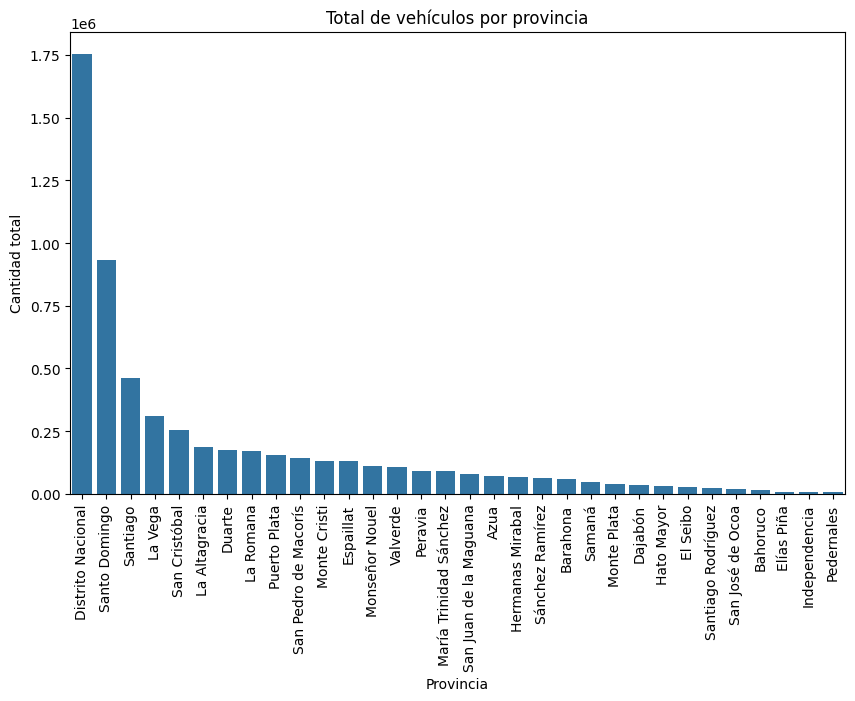

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='provincia', y= 'total', data=df_2023, order=df_2023.sort_values(by='total', ascending=False)['provincia'])
plt.title('Total de vehículos por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad total')
plt.xticks(rotation=90)
plt.show()

Vemos como se eleva por encima de las demás el Distrito Nacional, donde se concentra el 30% del parque vehicular del país.

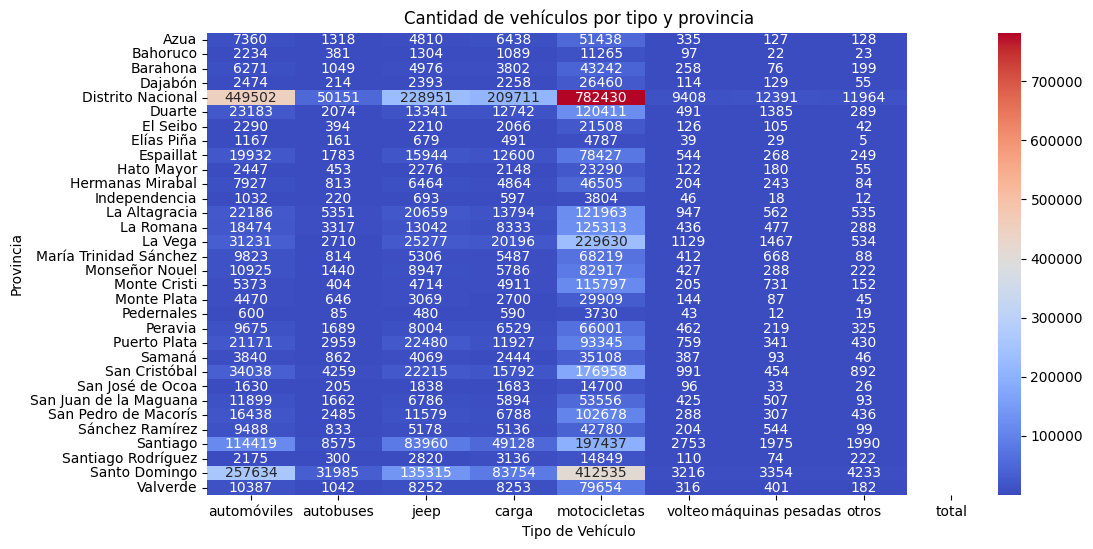

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_2023[columnas_int_sin_total], annot=True, fmt='d', cmap='coolwarm', xticklabels=columnas_int, yticklabels=df_2023['provincia'])
plt.title('Cantidad de vehículos por tipo y provincia')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Provincia')
plt.show()

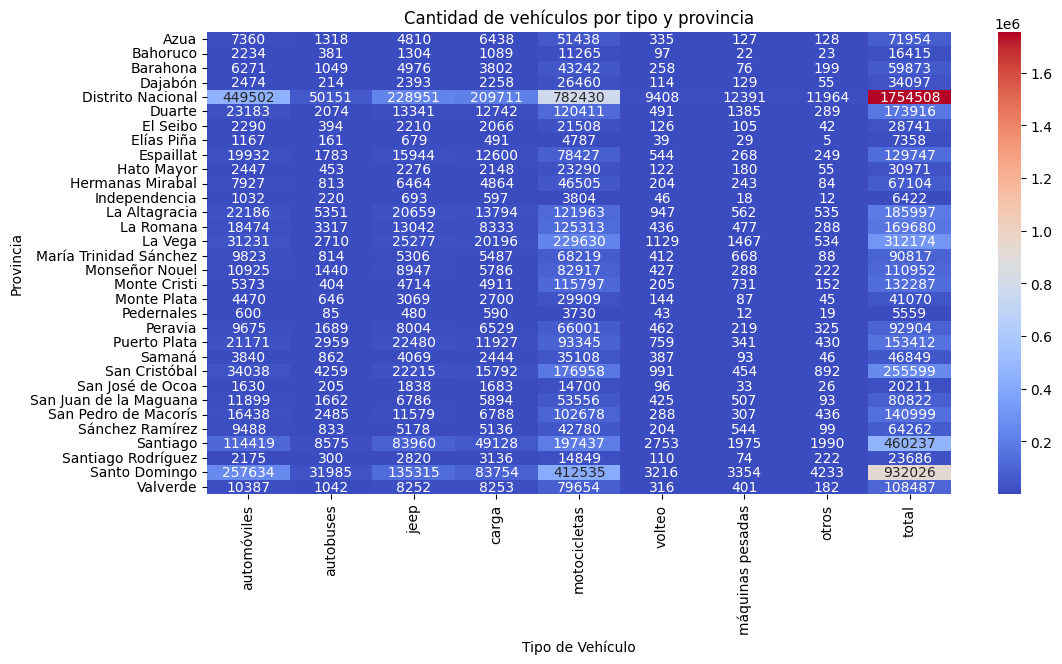

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_2023[columnas_int], annot=True, fmt='d', cmap='coolwarm', xticklabels=columnas_int, yticklabels=df_2023['provincia'])
plt.title('Cantidad de vehículos por tipo y provincia')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Provincia')
plt.show()

### Observaciones por Tipo de Vehículo

(Cabe destacar que Santo Domingo es **10 veces más grande** que el Distrito Nacional).

- **Automóviles**:  
  - Solo en el **Distrito Nacional**, **Santo Domingo** y **Santiago** se superan las **100,000 unidades**.

- **Autobuses**:  
  - No poseen una gran concentración destacable.  
  - Las provincias con mayor concentración son el **Distrito Nacional** y **Santo Domingo**, lo cual es lógico considerando que estas son dos de las provincias con mayor población y demanda de movilización de personas.

- **Jeeps**:  
  - Tienen una participación similar a la categoría de autobuses.  
  - Predominan en el **Distrito Nacional**, con más de **200,000 unidades**.  
  - Solo **Santo Domingo** supera el centenar de miles, seguido de **Santiago**, con algo más de **80,000 unidades**.

- **Vehículos de carga**:  
  - Siguen el mismo patrón donde el **Distrito Nacional** supera a las demás provincias.  
  - Esto tiene sentido debido al alto movimiento de mercancías pesadas y construcciones que requieren movilización constante de materiales.

- **Motocicletas**:  
  - Existe una **diferencia notable** entre el Distrito Nacional y las demás provincias, aunque es más frecuente encontrar provincias con más de **100,000 unidades** de motocicletas.  
  - Provincias destacadas con más de 100,000 unidades:  
    - **La Romana**, **La Altagracia**, **Duarte**, **Monte Cristi** y **San Pedro de Macorís**.  
  - Solo **tres provincias** tienen menos de **10,000 unidades**, lo cual refleja la preferencia nacional por este medio de transporte debido a:  
    - Su rapidez y facilidad de movilidad.  
    - Menores gastos en comparación con vehículos de cuatro ruedas.


In [16]:
df_2023[['provincia', 'automóviles']].sort_values(by='automóviles', ascending=False).head()

,provincia,automóviles
4,Distrito Nacional,449502
30,Santo Domingo,257634
28,Santiago,114419
23,San Cristóbal,34038
14,La Vega,31231


In [17]:
df_2023[['provincia', 'motocicletas']].sort_values(by='motocicletas', ascending=False)[:10]

,provincia,motocicletas
4,Distrito Nacional,782430
30,Santo Domingo,412535
14,La Vega,229630
28,Santiago,197437
23,San Cristóbal,176958
13,La Romana,125313
12,La Altagracia,121963
5,Duarte,120411
17,Monte Cristi,115797
26,San Pedro de Macorís,102678


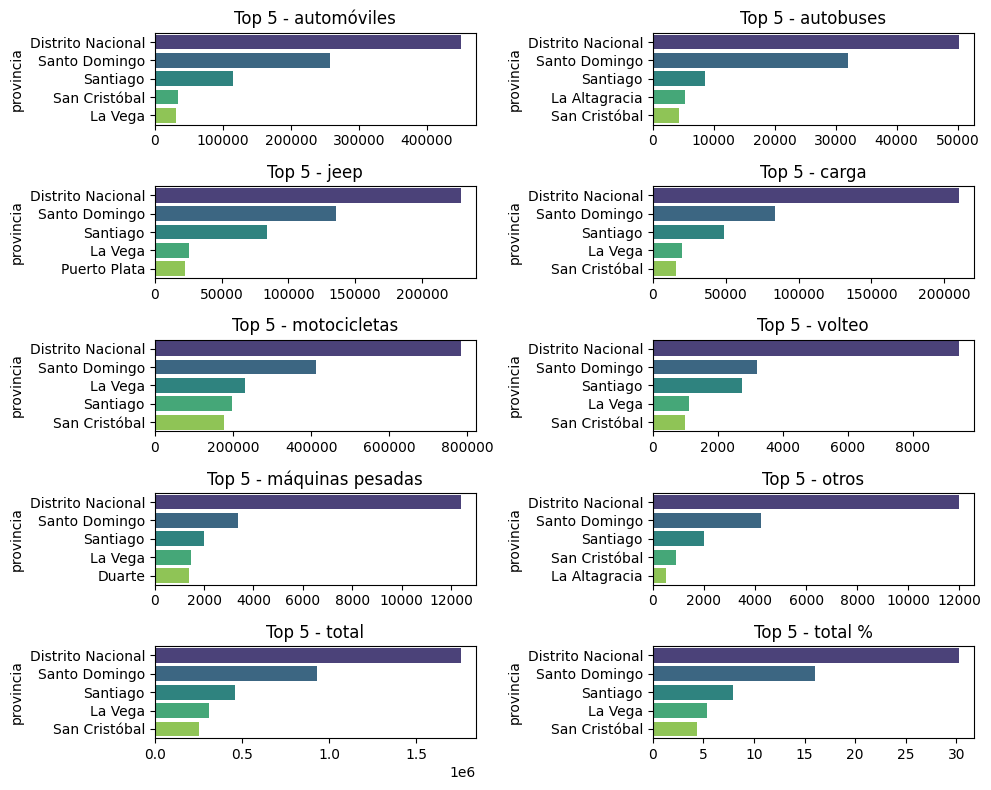

In [18]:
f.plot_top_numericas(dataframe=df_2023, columna_categoria='provincia', top_n=5)

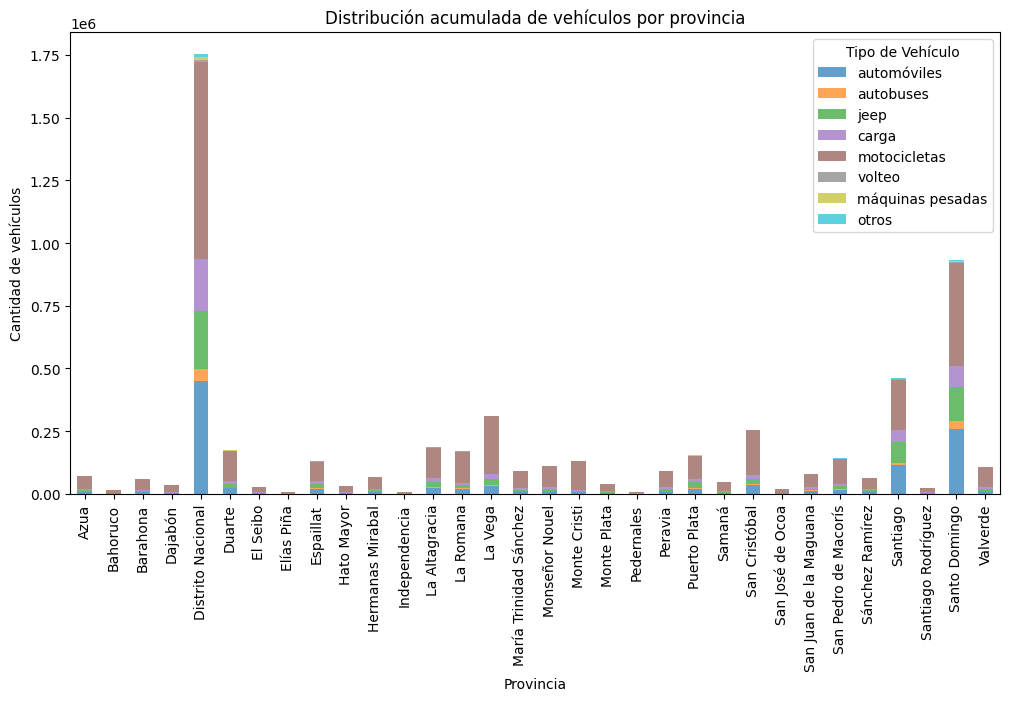

In [19]:
df_2023[columnas_int_sin_total].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10', alpha=0.7)
plt.title('Distribución acumulada de vehículos por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de vehículos')
plt.xticks(ticks=range(len(df_2023['provincia'])), labels=df_2023['provincia'], rotation=90)
plt.legend(title='Tipo de Vehículo')
plt.show()

### EDA Histórico Parque Vehicular

### Avance Histórico de los Medios de Transporte (1998-2024)

Se destacan tres categorías principales: **Automóviles**, **Jeep** y **Motocicletas**.

- **Motocicletas**:  
  - En **1998**, había **271,753 unidades** registradas.  
  - Para **2024**, la cifra superó los **3 millones** (**3,533,418**), con un aumento de **3,261,665 unidades**.  
  - Este es el grupo con **mayor presencia** entre los medios de transporte en la República Dominicana.

- **Automóviles**:  
  - En **1998**, había menos de **medio millón** de unidades (**380,382**).  
  - Para **2024**, la cifra había aumentado a **1,158,464** unidades.  
  - Aunque el crecimiento ha sido gradual, se ha multiplicado casi por 4, no ha sido tan marcado como el de las motocicletas.

- **Jeep**:  
  - En **1998**, la cantidad no alcanzaba **50,000 unidades** registradas (**39,535**), ocupando el cuarto lugar detrás de los vehículos de carga.  
  - Para **2024**, el número se ha elevado por mucho, alcanzando **736,744 unidades** y superando los vehículos de carga y así se convirtió en la tercera categoría con más presencia en el país.

---

### Crecimiento del Parque Vehicular por Décadas

- **1998-2000**:  
  - Entos años fueron muy importantes ya que registran cuando se supera el **millón** de unidades, pasando de **936,083** a **1,294,998**.

- **2001-2010**:  
  - En la primera década documentada, el número de vehículos aumentó en casi **un millón**, pasando de **1,436,165** a **2,734,740**.

- **2011-2020**:  
  - En esta década, se observa un incremento de **2 millones** en tan solo 10 años.  
  - En **2012**, se superaron los **3 millones** de vehículos registrados.  
  - Para **2017**, la cifra superó los **4 millones**, y la década cerró con **4,842,367 vehículos**.

- **2021-2024**:  
  - En el primer año de la década, **2021**, se alcanzó un nuevo hito al superar los **5 millones** de vehículos.  
  - En apenas tres años más, de **2022 a 2024**, se alcanzaron los **6 millones** de unidades llegando a **6,197,719**

---


In [20]:
df_historico = pd.read_csv('../../Datos/datos_parquev/registro_historico_anios_cat.csv', index_col=0)

In [21]:
total_history = df_historico.iloc[[-1]]

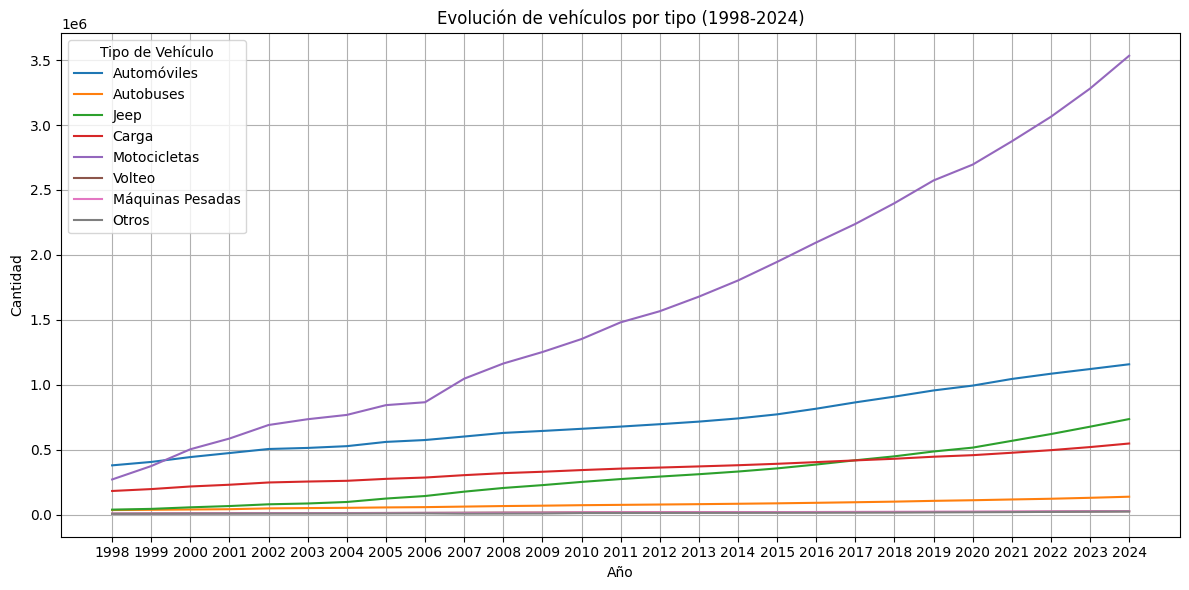

In [22]:
# cambio el formato al DataFrame a formato largo
df_long = df_historico[:8].melt(id_vars='Tipo', 
                            var_name='Año', 
                            value_name='Cantidad')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Año', y='Cantidad', hue='Tipo')
plt.title('Evolución de vehículos por tipo (1998-2024)')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de Vehículo')
plt.grid(True)
plt.tight_layout()
plt.show()

### Observaciones del Crecimiento Vehicular

Se puede visualizar el aumento que viene desde años anteriores, destacando las siguientes observaciones:

- **Motocicletas**:  
  - Han alcanzado más de **3.5 millones de unidades** para noviembre de **2024**.

- **Automóviles**:  
  - Aunque años atrás tenía un crecimiento con ímpetu, después de cruzar el **1,000,000 unidades** su despegue se ha visto menos disparado que en periodos anteriores.

- **Jeep**:  
  - Han superado un nuevo hito, cruzando la barrera de las **700,000 unidades** y dejando en cuarto lugar a los vehículos de carga.

- **Otras categorías**:  
  - Las demás categorías presentan crecimientos poco significativos en el tiempo por lo que se mantienen un crecimiento visiblemente más rezagado pero constante.


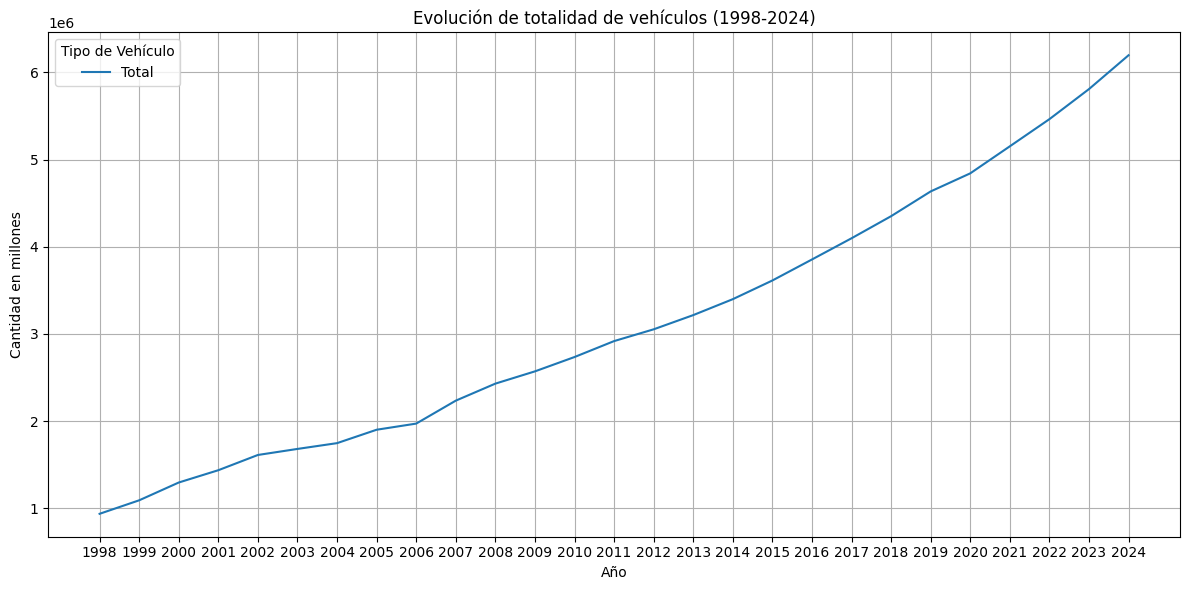

In [23]:
# aqui solo me quedo con el formato largo de la fila total
df_long_total = total_history[-1:].melt(id_vars='Tipo', 
                            var_name='Año', 
                            value_name='Cantidad')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long_total, x='Año', y='Cantidad', hue='Tipo')
plt.title('Evolución de totalidad de vehículos (1998-2024)')
plt.xlabel('Año')
plt.ylabel('Cantidad en millones')
plt.legend(title='Tipo de Vehículo')
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights sobre la Evolución Total de Vehículos (1998-2024)

1. **Crecimiento constante**:  
   - La cantidad total de vehículos ha mostrado un crecimiento sostenido desde **1998** hasta **2024**, reflejando un aumento continuo en la motorización del país.

2. **Incrementos significativos**:  
   - A partir de **2005**, el crecimiento se acelera notablemente, lo que podría deberse a una mayor accesibilidad económica a los vehículos o cambios en las políticas de transporte.

3. **Hitos importantes**:  
   - **2012**: Se supera la barrera de los **3 millones** de vehículos.  
   - **2017**: Se alcanza y supera la marca de los **4 millones** de vehículos.  
   - **2021**: Se logra un nuevo hito al superar los **5 millones**.  
   - **2024**: El total supera los **6 millones** de vehículos.

4. **Tendencia a largo plazo**:  
   - La gráfica sugiere que la cantidad de vehículos continuará aumentando significativamente si no se implementan medidas para diversificar los medios de transporte o mejorar el transporte público.

5. **Posible impacto**:  
   - Este incremento continuo podría tener consecuencias importantes, tales como:
     - **Congestión vehicular**.  
     - **Aumento en las emisiones de carbono**.  
     - **Presión sobre la infraestructura vial**.


In [24]:
df_transpose = pd.read_csv('../../Datos/datos_parquev/df_historico_transpose.csv', index_col=0)

In [25]:
df_transpose = df_transpose[['anio', 'total']]
df_transpose['tasa_crecimiento'] = df_transpose['total'].pct_change() * 100
df_transpose['aumento'] = df_transpose['total'] - df_transpose['total'].shift(1)

In [26]:
df_transpose['aumento'] = df_transpose['aumento'].astype('Int64')  # Usa el tipo de dato Int64 que permite NaN
df_transpose

,anio,total,tasa_crecimiento,aumento
1,1998,936083,NaN,<NA>
2,1999,1090833,16.53,154750
3,2000,1294998,18.72,204165
4,2001,1436165,10.90,141167
5,2002,1611023,12.18,174858
6,2003,1680382,4.31,69359
7,2004,1746756,3.95,66374
8,2005,1900564,8.81,153808
9,2006,1971011,3.71,70447
10,2007,2234307,13.36,263296


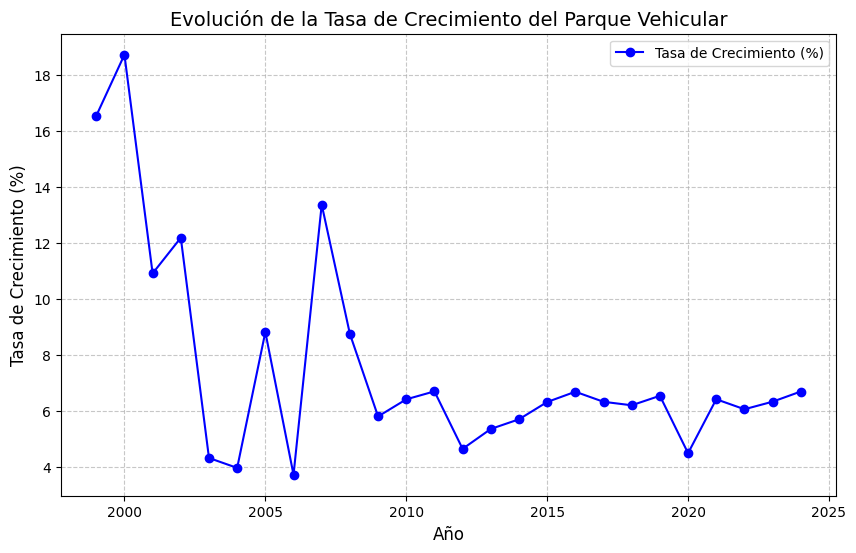

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(df_transpose['anio'], df_transpose['tasa_crecimiento'], marker='o', color='b', label='Tasa de Crecimiento (%)')
plt.title('Evolución de la Tasa de Crecimiento del Parque Vehicular', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Tasa de Crecimiento (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()